In [56]:
import pandas as pd
import numpy as np

df=pd.read_csv('../data/house_data_fs.csv', index_col = 0)
df = df.dropna()
df1 = df.head(50)

### Linear regression model using a single feature

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

X = df1['sqft_living'].values
y = df1['price'].values


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(-1,1))

lr = LinearRegression()
model = lr.fit(X_scaled, y)

y_pred_linear = model.predict(X_scaled)
r2_linear = model.score(X_scaled, y)
mse_linear = mean_squared_error(y, y_pred_linear)
mae_linear = mean_absolute_error(y, y_pred_linear)

print('R² score:', r2_linear)
print('Mean Squared Error (MSE):', mse_linear)
print('Mean Absolute Error (MAE):', mae_linear)

R² score: 0.4173461244343011
Mean Squared Error (MSE): 62185849719.2222
Mean Absolute Error (MAE): 161171.373785871


### Visualization for Linear Regression model

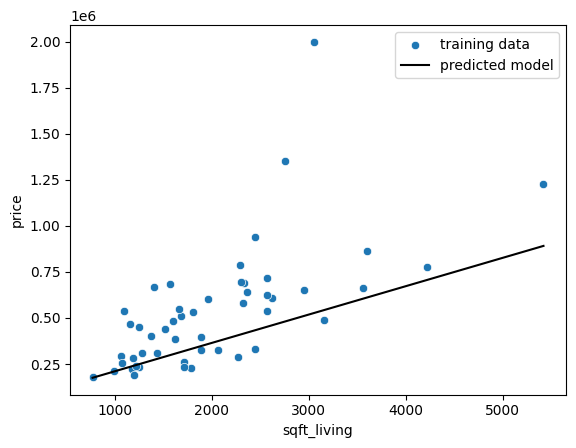

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data = df1, x = 'sqft_living', y = 'price')
x_model = np.linspace(df1['sqft_living'].min(), df1['sqft_living'].max(), 50)
y_model = model.predict(scaler.fit_transform(x_model.reshape(-1,1)))
plt.plot(x_model,  y_model, color = 'k')
plt.legend(['training data', 'predicted model'])
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

lr_test = LinearRegression()
model_linear_test = lr_test.fit(X_train_linear, y_train_linear)

y_test_pred_linear = model_linear_test.predict(X_test_linear)

r2_test_linear = r2_score(y_test_linear, y_test_pred_linear)
mse_test_linear = mean_squared_error(y_test_linear, y_test_pred_linear)
mae_test_linear = mean_absolute_error(y_test_linear, y_test_pred_linear)

print("Test R² score:", r2_test_linear)
print("Test MSE:", mse_test_linear)
print("Test MAE:", mae_test_linear)

Test R² score: 0.2884068061717603
Test MSE: 28447140515.781452
Test MAE: 131908.02553859283


### Polynomial regression :
1) Feature scaling and Transform poly features 
2) model using a linear regression. 
3) Predict using the Model 

In [52]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

#Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(-1,1))

# Poly transformation 
order = 2
poly = PolynomialFeatures(degree=order, include_bias=False)
poly_features = poly.fit_transform(X_scaled.reshape(-1, 1))

# Modeling. 
lr = LinearRegression()
model = lr.fit(poly_features, y)
print(model.coef_, model.intercept_)

#Prediction

Y_pred = model.predict(poly_features)
rscore = model.score(poly_features, y)
mse = mean_squared_error(y, Y_pred)
mae = mean_absolute_error(y, Y_pred)

print('R² score:', rscore)
print('Mean Squared Error (MSE):', mse)
print('Mean Absolute Error (MAE):', mae)


[240878.63506291 -21125.66947931] 553564.2694793064
R² score: 0.4284636974265923
Mean Squared Error (MSE): 60999286388.34267
Mean Absolute Error (MAE): 157625.26745223164


### Visualization for Poly regression

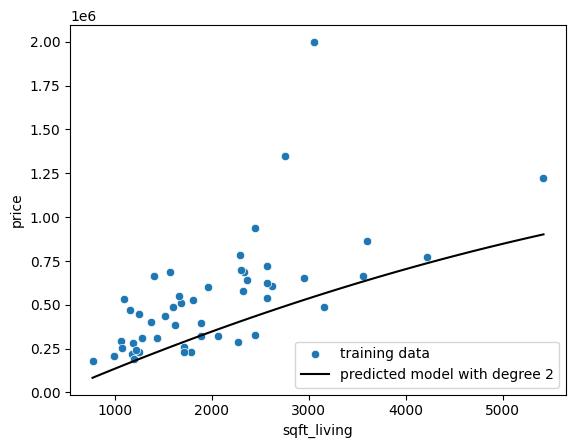

In [53]:
sns.scatterplot(data = df1, x = 'sqft_living', y = 'price')
x_model = np.linspace(df1['sqft_living'].min(), df1['sqft_living'].max(), 50)
x_model_scaled = scaler.fit_transform(x_model.reshape(-1,1))

x_model_poly  = poly.fit_transform(x_model_scaled)
y_model = model.predict(x_model_poly)

plt.plot(x_model,  y_model, color = 'k')
plt.legend(['training data', 'predicted model with degree ' + str(order)])
plt.show()

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression().fit(X_train_poly, y_train)
y_test_pred = model.predict(X_test_poly)

r2_test_poly = r2_score(y_test, y_test_pred)
mse_test_poly = mean_squared_error(y_test, y_test_pred)
mae_test_poly = mean_absolute_error(y_test, y_test_pred)

print("Test R² score:", r2_test_poly)
print("Test MSE:", mse_test_poly)
print("Test MAE:", mae_test_poly)


Test R² score: 0.25128994176215413
Test MSE: 29930949898.056313
Test MAE: 137593.45392249516


### Saving Best Model for Deployment

In [55]:
import joblib
best_order = 2
X = df1['sqft_living'].values
y = df1['price'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(-1,1))

poly = PolynomialFeatures(degree=best_order, include_bias=False)
poly_features = poly.fit_transform(X_scaled.reshape(-1, 1))
    
lr = LinearRegression()
model = lr.fit(poly_features, y)

joblib.dump(model,'best_model.pkl')

Y_pred = model.predict(poly_features)
rscore = model.score(poly_features, y)
mse = mean_squared_error(y, Y_pred)
mae = mean_absolute_error(y, Y_pred)
print('r2-score:', rscore, '\nmean squared error:', np.round(mse), '\nmean absolute error:', np.round(mae))

r2-score: 0.4284636974265923 
mean squared error: 60999286388.0 
mean absolute error: 157625.0
